# **Introduction**

In this programming assignment, you will continue practicing implementing dynamic programming solutions.

## Maximum Amount of Gold

Problem Description

**Task.** Given 𝑛 gold bars, find the maximum weight of gold that fits into a bag of capacity 𝑊.

**Input Format.** The first line of the input contains the capacity 𝑊 of a knapsack and the number 𝑛 of bars of gold. The next line contains 𝑛 integers 𝑤0,𝑤1, . . . ,𝑤𝑛−1 defining the weights of the bars of gold.

**Constraints.** 1 ≤ 𝑊 ≤ $10^4$; 1 ≤ 𝑛 ≤ 300; 0 ≤ 𝑤0, . . . ,𝑤𝑛−1 ≤ $10^5$.

**Output Format.** Output the maximum weight of gold that fits into a knapsack of capacity 𝑊.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`10 3`

`1 4 8`

Output:

`9`

Here, the sum of the weights of the first and the last bar is equal to 9.


In [ ]:
# Direct Solution

# Python3

import math
import time
import numpy

# Discrete Knapsack problem without repetition
def maxGold(W, n, items):
    """ Outputs the maximum weight of gold that fits in knapsack of capacity W
    (int, int, list) -> (int, 2D-array) """

    value = numpy.zeros((W+1, n+1))
    for i in range(1, W+1):
        for j in range(1, n+1):
            # if item i is not part of optimal knapsack
            value[i][j] = value[i][j-1]
            if items[j-1]<=i:
                # if item i is part of optimal knapsack
                temp = value[i-items[j-1]][j-1] + items[j-1]
                # max(i in knapsack, i not in knapsack)
                if temp > value[i][j]:
                    value[i][j] = temp

    return (int(value[W][n]), value)

def printItems(value, items, i, j, arr):
    """ Finds which items are present in optimal solution and returns a boolean array 
    (2D-array, list, int, int, list) -> (list) """

    if i == 0 and j == 0:
        arr.reverse()
        return arr
    if value[i][j] == value[i][j-1]:
        arr.append(0)
        return printItems(value, items, i, j-1, arr)
    else:
        arr.append(1)
        return printItems(value, items, i-items[j-1], j-1, arr)
        
if __name__ == '__main__':
    W, n               = [int(i) for i in input().split()]
    item_weights       = [int(i) for i in input().split()]
    max_weight, Matrix = maxGold(W, n, item_weights)
    bool_vector      = printItems(Matrix, item_weights, W, n, [])
    optimal = [str(j) for i, j in enumerate(item_weights) if bool_vector[i]]
    print(f"Weights in knapsack of capacity {W}: {' '.join(optimal)}")

In [5]:
# Direct Solution - C++ (Python marks an out-of-bounds index, so c++ it is)

%%writefile Gold.cpp

#include <iostream>
#include <vector>

using namespace std;

int optimal_weight(int W, const vector<int> &w) {
	vector<vector<int>> values(w.size() + 1, vector<int>(W + 1));
	for (size_t i = 0; i <= W; i++) { values[0][i] = 0; }
	for (size_t i = 0; i <= w.size(); i++) { values[i][0] = 0; }

	for (size_t i = 1; i <= w.size(); i++) {
		for (size_t j = 1; j <= W; j++) {
			if (j >= w[i - 1]) {
				values[i][j] = max(w[i - 1] + values[i - 1][j - w[i - 1]],
								   values[i - 1][j]);
			} else {
				values[i][j] = values[i - 1][j];
			}
		}
	}

	return values[w.size()][W];
}

int main() {
	int n, W;
	std::cin >> W >> n;
	vector<int> w(n);
	for (int i = 0; i < n; i++) { std::cin >> w[i]; }
	std::cout << optimal_weight(W, w) << '\n';
}

Writing Gold.cpp


In [6]:
%%shell 
g++ Gold.cpp -o output
./output

10 3
1 4 8
9


## Partitioning Souvenirs

Problem Description

You and two of your friends have just returned back home after visiting various countries. Now you wouldlike to evenly split all the souvenirs that all three of you bought.

**Input Format.** The first line contains an integer 𝑛. The second line contains integers 𝑣1, 𝑣2, . . . , 𝑣𝑛 separated by spaces.

**Constraints.** 1 ≤ 𝑛 ≤ 20, 1 ≤ 𝑣𝑖 ≤ 30 for all 𝑖.

**Output Format.** Output 1, if it possible to partition 𝑣1, 𝑣2, . . . , 𝑣𝑛 into three subsets with equal sums, and 0 otherwise.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`4`

`3 3 3 3`

Output:

`0`

$\hspace{0.2cm}$

$\underline{Sample \hspace{0.2cm} 2.}$

Input:

`1`

`40`

Output:

`0`

$\hspace{0.2cm}$

$\underline{Sample \hspace{0.2cm} 3.}$

Input:

`11`

`17 59 34 57 17 23 67 1 18 2 59`

Output:

`1`

$34 + 67 + 17 = 23 + 59 + 1 + 17 + 18 = 59 + 2 + 57.$

$\hspace{0.2cm}$

$\underline{Sample \hspace{0.2cm} 4.}$

Input:

`13`

`1 2 3 4 5 5 7 7 8 10 12 19 25`

Output:

`1`

$1 + 3 + 7 + 25 = 2 + 4 + 5 + 7 + 8 + 10 = 5 + 12 + 19.$

In [8]:
# Direct Solution

# Python3

import math
import time
import numpy

def partitions(W, n, items):
    """ Finds if number of partitions having capacity W is >=3
    (int, int, list) -> (int) """
    count = 0 
    value = numpy.zeros((W+1, n+1))
    for i in range(1, W+1):
        for j in range(1, n+1):
            value[i][j] = value[i][j-1]
            if items[j-1]<=i:
                temp = value[i-items[j-1]][j-1] + items[j-1]
                if temp > value[i][j]:
                    value[i][j] = temp
            if value[i][j] == W: count += 1

    if count < 3: print('0')
    else: print('1')

if __name__ == '__main__':
    n = int(input())
    item_weights = [int(i) for i in input().split()]
    start_time = time.time()
    total_weight = sum(item_weights)
    if n<3: 
        print('0')
    elif total_weight%3 != 0: 
        print('0')
    else:
        partitions(total_weight//3, n, item_weights)

    print("--- %s seconds ---" % (time.time() - start_time))    

13
1 2 3 4 5 5 7 7 8 10 12 19 25
1
--- 0.002674102783203125 seconds ---


## Partitioning Souvenirs

Problem Description

**Task.** Find the maximum value of an arithmetic expression by specifying the order of applying its arithmetic operations using additional parentheses.

**Input Format.** The only line of the input contains a string 𝑠 of length 2𝑛 + 1 for some 𝑛, with symbols 𝑠0, 𝑠1, . . . , 𝑠2𝑛. Each symbol at an even position of 𝑠 is a digit (that is, an integer from 0 to 9) while
each symbol at an odd position is one of three operations from {+,-,*}.

**Constraints.** 0 ≤ 𝑛 ≤ 14 (hence the string contains at most 29 symbols).

**Output Format.** Output the maximum possible value of the given arithmetic expression among different orders of applying arithmetic operations.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`1 + 5`

Output:

`6`

$\hspace{0.2cm}$

$\underline{Sample \hspace{0.2cm} 2.}$

Input:

`5-8+7*4-8+9`

Output:

`200`

200 = (5 − ((8 + 7) × (4 − (8 + 9))))

In [9]:
# Direct Solution

# Python3

import math
import time
import numpy

def calc(a, b, op):
    """ Evaluates the expression (a op b)
    (int, int, char) -> (int) """
    if op == '+':
        return a + b
    elif op == '-':
        return a - b
    else:
        return a * b


def MinAndMax(M, m, i, j, operators):
    """ Finds the optimal values i.e. min and max for a subproblem 
    (2D-array, 2D-array, int, int, list) -> (int, int) """
    min_value = math.inf
    max_value = -math.inf
    for k in range(i, j):
        a = calc(M[i][k], M[k+1][j], operators[k])
        b = calc(M[i][k], m[k+1][j], operators[k])
        c = calc(m[i][k], M[k+1][j], operators[k])
        d = calc(m[i][k], m[k+1][j], operators[k])
        min_value = min(min_value, a, b, c, d)
        max_value = max(max_value, a, b, c, d)
    return min_value, max_value


def get_maximum_value(operands, operators):
    """ Adds parentheses to a given arithmetic expression to maximize its value 
    (list, list) -> (int) """
    n = len(operands)
    m = [[None for x in range(n)] for x in range(n)]
    M = [[None for x in range(n)] for x in range(n)]

    for i in range(n):
        m[i][i] = operands[i]
        M[i][i] = operands[i]

    for s in range(1, n):
        for i in range(0, n-s):
            j = i + s
            m[i][j], M[i][j] = MinAndMax(M, m, i, j, operators)

    return M[0][n-1]


if __name__ == "__main__":
    expression = input()
    operators, operands = [], []

    for i in expression:
        if i in ['+', '-', '*']:
            operators.append(i)
        else:
            operands.append(int(i))
    start_time = time.time()
    print(get_maximum_value(operands, operators))
    print("--- %s seconds ---" % (time.time() - start_time))   

5-8+7*4-8+9
200
--- 0.0009205341339111328 seconds ---


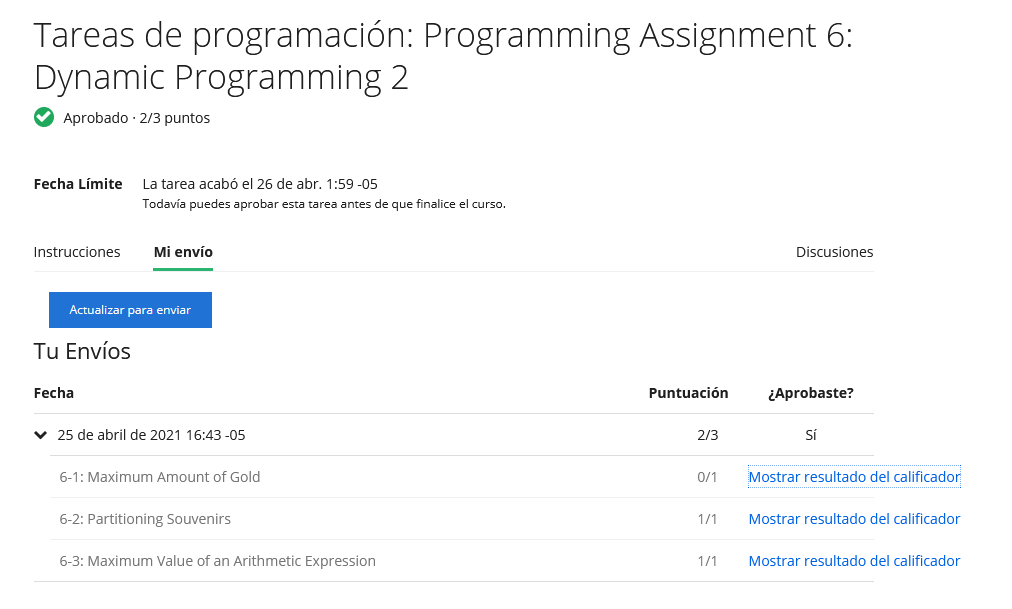